## 신경망 학습

* 교차 엔트로피

In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

* 손실함수는 미분가능하고 연속적이어야한다.

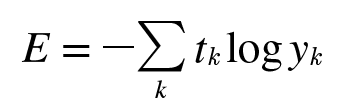

In [2]:
Image("e 4.2.png", width=200)

In [3]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta)) # underflow 방지

In [4]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [5]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t)) # 잘못 예측하면 값 커짐

2.302584092994546

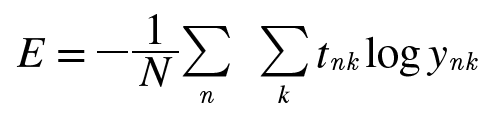

In [6]:
Image("e 4.3.png", width=200)

In [7]:
def cross_entropy_error(y, t):
    delta = 1e-7
    if y.ndim == 1:
        y = y.reshape(1, y.size)
        t = t.reshape(1, t.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+delta)) / batch_size # np.sum(axis=0)이 default라서 생략함

In [8]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

* 미분

In [9]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

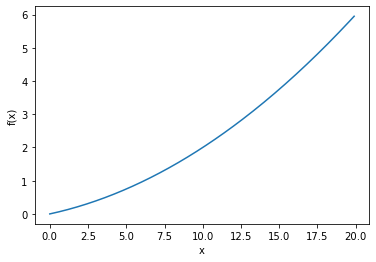

In [10]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)

* 중앙 차분에 의한 수치 미분

In [32]:
def numerical_diff(f, x): # 단순 미분해주는 함수, x가 하나의 값임
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

y = ax+b<br>
b = y-ax

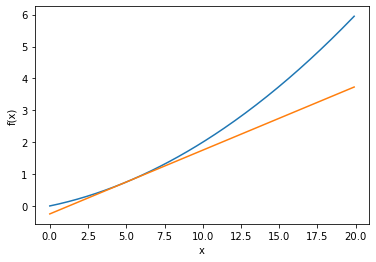

In [33]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

a = numerical_diff(function_1, 5)
b = function_1(5) - (a * 5)
y2 = a*x + b

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.plot(x, y2)

* 그레디언트 (편미분의 벡터)

In [35]:
def numerical_gradient(f, x): # 여러 개의 x값(특성)이 들어감
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = (tmp_val + h)
        fxh1 = f(x)            # f(x+h)
        
        x[idx] = (tmp_val - h)
        fxh2 = f(x)            # f(x-h)
        
        grad[idx] = (fxh1-fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [36]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [37]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

* 경사하강법

In [39]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        
        x = x-(lr*grad)
    return x

In [40]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

* 신경망에서의 기울기

In [56]:
def numerical_gradient(f, x): # 함수와 가중치가 입력으로 들어옴
    h = 1e-4
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = (tmp_val + h)
        fxh1 = f(x)            # f(x+h)
        
        x[idx] = (tmp_val - h)
        fxh2 = f(x)            # f(x-h)
        
        grad[idx] = (fxh1-fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()
    return grad

In [57]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # overflow 방지
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [58]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # 정규분포로 초기화
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [59]:
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()
f = lambda w: net.loss(x, t)
dw = numerical_gradient(f, net.W)

In [60]:
net.W # 랜덤하게 설정한 가중치

array([[ 1.53401957, -1.38709965, -2.16700125],
       [-0.57258732,  1.48868615, -0.16846311]])

In [61]:
dw    # 기울기 벡터

array([[ 0.26500967,  0.29360664, -0.55861632],
       [ 0.39751451,  0.44040997, -0.83792448]])